тип орбиты Body1:
Ellipse
тип орбиты Body2:
Hyperbola


<IPython.core.display.Javascript object>


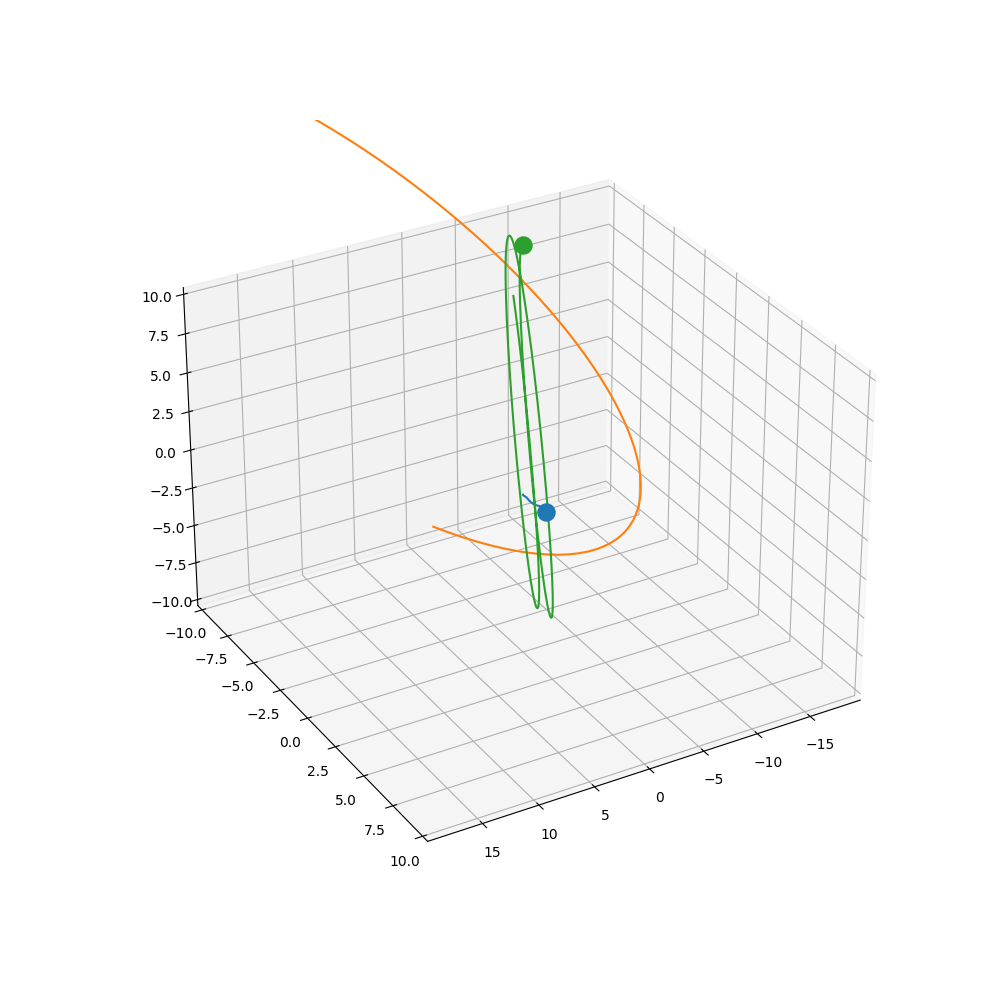

100%|██████████| 300/300 [00:50<00:00,  5.99it/s]


In [81]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import math
import imageio
%matplotlib notebook
G = 6.67*10**-1
dt = 5e-2

def del_arr(arr, a):
    for i in range(len(arr)):
        if arr[i]==a:
            arr.pop(i)
            break
    return arr
@dataclass
class CosmicBody: 
    time: float
    mass: float
    obj_radius: float
    velocity: np.ndarray
    radius_vector: np.ndarray
    def gravitate(self, bodies):             
   
        for i in bodies:
                r_i = i.radius_vector - self.radius_vector
                if np.all(r_i) !=0:
                    self.velocity += np.dot(G*dt/(np.linalg.norm(r_i)**3)*i.mass, r_i)
                
        self.radius_vector += dt*self.velocity
        return self
    def orbit_type(self, bodies):
        E = self.mass*np.linalg.norm(self.velocity)**2/2
        for i in bodies:
            r_i= i.radius_vector-self.radius_vector
            if np.all(r_i!=0):
                E -= G*self.mass*i.mass/np.linalg.norm(r_i)
        if E > 0:
            print('Hyperbola')
            
        elif E == 0:
            print('Parabola')
            
        elif E < 0:
            print('Ellipse')
            
class System:
    def __init__(self,bodies,t,dt):
        exist_bodies = []
        not_exist_bodies = []
        for i in bodies:
            if i.time == 0:
                exist_bodies.append(i)
            if i.time>0:
                not_exist_bodies.append(i)
        self.exist = exist_bodies
        self.not_exist = not_exist_bodies  
        self.t=t
        self.dt=dt
        
    
    def add(self, t):
        a = self.not_exist.copy()
        for i in a:
            if i.time <= t:
                self.exist.append(i)
                del_arr(self.not_exist, i)
        return self
    def destroy(self):
        a = self.exist.copy()
        for i in a:
            
            for j in a:
                d=i.obj_radius+j.obj_radius
                if i != j and np.linalg.norm(i.radius_vector - j.radius_vector)<d:
                    del_arr(self.exist, i)
                    del_arr(self.exist, j)
        return self
    
    def step(self, t):
        self.add(t)
        self.destroy()
        for j in self.exist:
            j.gravitate(self.exist)
        return self.exist
    
    def animation(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        x = []
        y = []
        z = []
        for i in self.exist:
            x.append(abs(i.radius_vector[0]))
            y.append(abs(i.radius_vector[1]))
            z.append(abs(i.radius_vector[2]))

        ax.axes.set_xlim3d(-max(x)-10, max(x)+10)
        ax.axes.set_ylim3d(-max(y)-10, max(y)+10)
        ax.axes.set_zlim3d(-max(z)-10, max(z)+10)

        length = len(self.exist)
        dt1 = self.dt
        t0 = self.t
        n = int(t0/dt1)
        count = -1
        line_x = np.array([0.0]*n*len(self.exist)).reshape(len(self.exist), n)
        line_y = np.array([0.0]*n*len(self.exist)).reshape(len(self.exist), n)
        line_z = np.array([0.0]*n*len(self.exist)).reshape(len(self.exist), n)

        for t in tqdm(np.arange(0., t0, dt1)):
            ax.clear()
            count += 1
            ax.axes.set_xlim3d(-max(x)-10, max(x)+10)
            ax.axes.set_ylim3d(-max(y)-10, max(y)+10)
            ax.axes.set_zlim3d(-max(z)-10, max(z)+10)

            try:
                for i in range(len(self.exist)):
                    line_x[i][count] = (self.exist[i].radius_vector[0])
                    line_y[i][count] = (self.exist[i].radius_vector[1])
                    line_z[i][count] = (self.exist[i].radius_vector[2])
                    ax.scatter(self.exist[i].radius_vector[0], self.exist[i].radius_vector[1], self.exist[i].radius_vector[2], s=150)
                    t1 = int(self.exist[i].time/dt1+1)
                    plt.plot(line_x[i][t1:count], line_y[i][t1:count], line_z[i][t1:count])

                self.step(t)
            except:
                print('Error')

            b = int(abs(len(self.exist)-length))
            c = np.zeros((b, n))
            line_x = np.concatenate((line_x, c))
            line_y = np.concatenate((line_y, c))
            line_z = np.concatenate((line_z, c))
            length = len(self.exist)
            ax.view_init(30, 60)

            fig.canvas.draw()
            
            plt.pause(0.005)
if __name__ == '__main__':
    star = CosmicBody(0.,1000.,1.,np.array([0.,0.,0.]),np.array([0.,0.,0.]))
    Body1 = CosmicBody(10.,5.,0.01,np.array([-1.,0.,-5.]),np.array([-10.,-10.,5.]))
    Body2 = CosmicBody(0.,7.,0.03,np.array([-7.,9.,0.]),np.array([9.,0.,0.]))
    s =[star,Body1,Body2]
    print("тип орбиты Body1:")
    Body1.orbit_type(s)
    print("тип орбиты Body2:")
    Body2.orbit_type(s)
    t=3000
    ddt=10
    a = System(s,t,ddt)
    a.animation()
    